In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel('Attrition Case Study.xlsx')

In [3]:
df.head(2)

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,0,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7


In [4]:
df.shape

(1470, 35)

# Missing Data treatment

In [5]:
df.isna().sum()

Attrition                   0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Attrition                 1470 non-null   int64 
 1   Age                       1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# Outliers

In [7]:
cat = []
con = []
for i in df.columns:
    if(df[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

In [8]:
df[con].nunique().sort_values()

#here values ranging 1-7 are actually categorical so we have to remove from con list and append them to cat list

EmployeeCount                  1
StandardHours                  1
Attrition                      2
PerformanceRating              2
WorkLifeBalance                4
StockOptionLevel               4
EnvironmentSatisfaction        4
RelationshipSatisfaction       4
JobInvolvement                 4
JobSatisfaction                4
Education                      5
JobLevel                       5
TrainingTimesLastYear          7
NumCompaniesWorked            10
PercentSalaryHike             15
YearsSinceLastPromotion       16
YearsWithCurrManager          18
YearsInCurrentRole            19
DistanceFromHome              29
YearsAtCompany                37
TotalWorkingYears             40
Age                           43
HourlyRate                    71
DailyRate                    886
MonthlyIncome               1349
MonthlyRate                 1427
EmployeeNumber              1470
dtype: int64

In [9]:
cat=cat+list(df[con].nunique().sort_values().index[0:13])

In [10]:
for i in list(df[con].nunique().sort_values().index[0:13]):
    con.remove(i)

# Standardize continous columns

In [11]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
array=ss.fit_transform(df[con])
X1=pd.DataFrame(array,columns=con)

# Remove outlier with Zscore

In [12]:
out = []
for i in X1.columns:
    out = out + list(X1[(X1[i]>3)|(X1[i]<-3)].index)

In [13]:
from numpy import unique
out=unique(out)

In [14]:
df=df.drop(index=out,axis=0)

In [15]:
df.shape

(1387, 35)

In [16]:
df.index=range(0,1387)

# EDA

# Univariate

visualize all the distribution,relationships

In [17]:
len(cat)

21

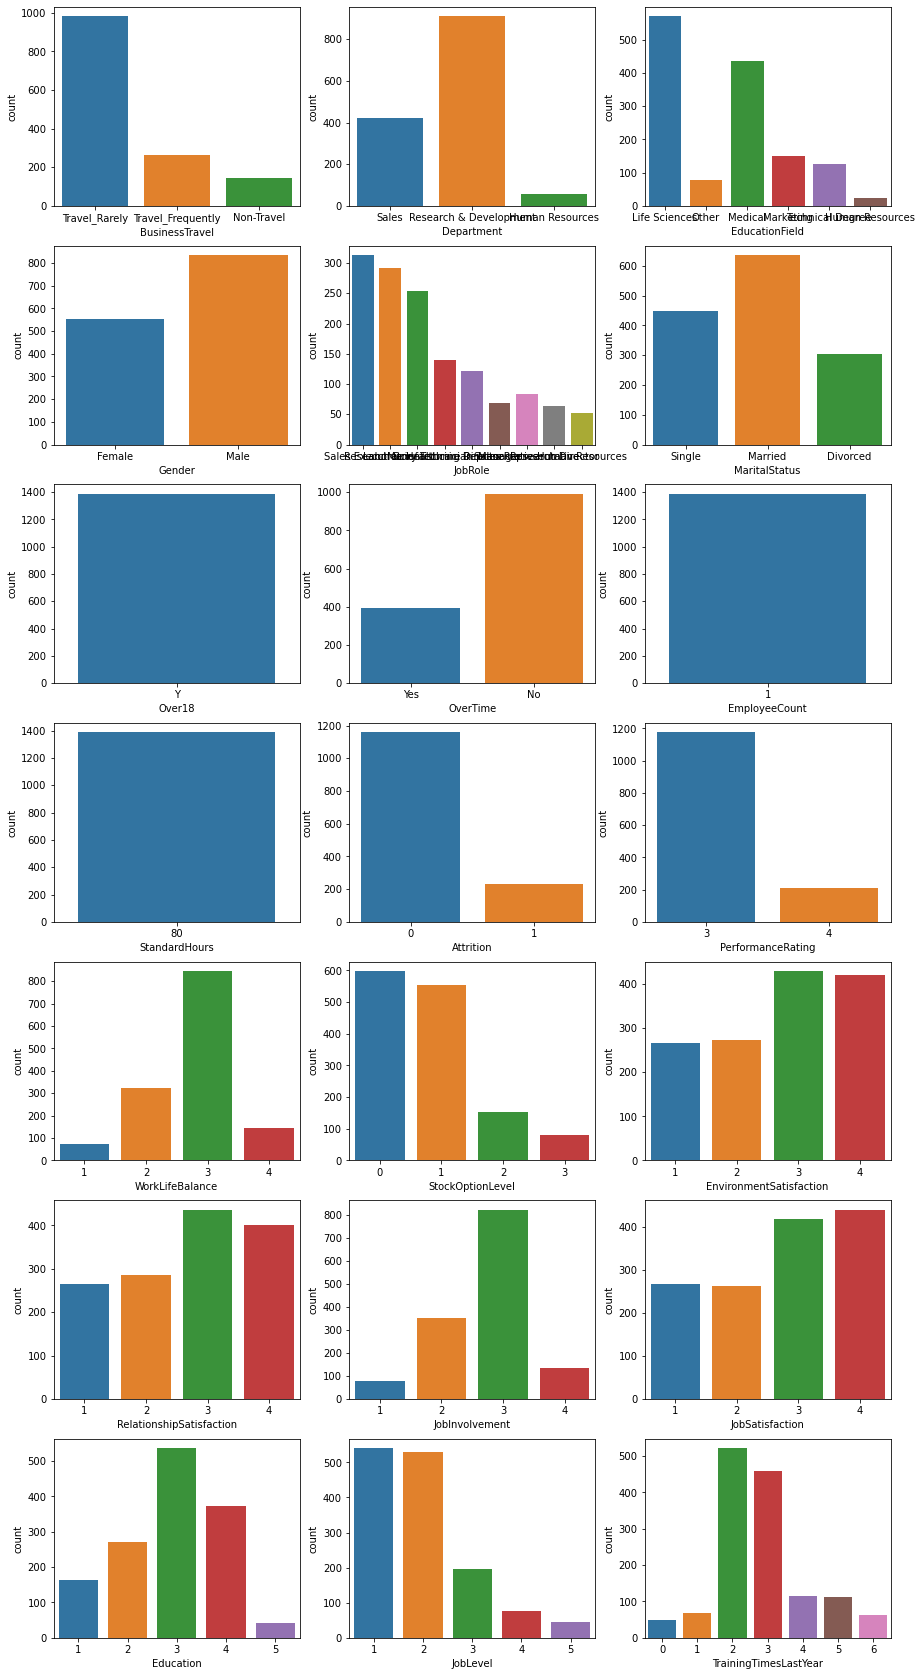

In [18]:
plt.figure(figsize=(15,30))
x=1
for i in cat:
    plt.subplot(7,3,x)
    sns.countplot(df[i])
    x=x+1

In [19]:
len(con)

14

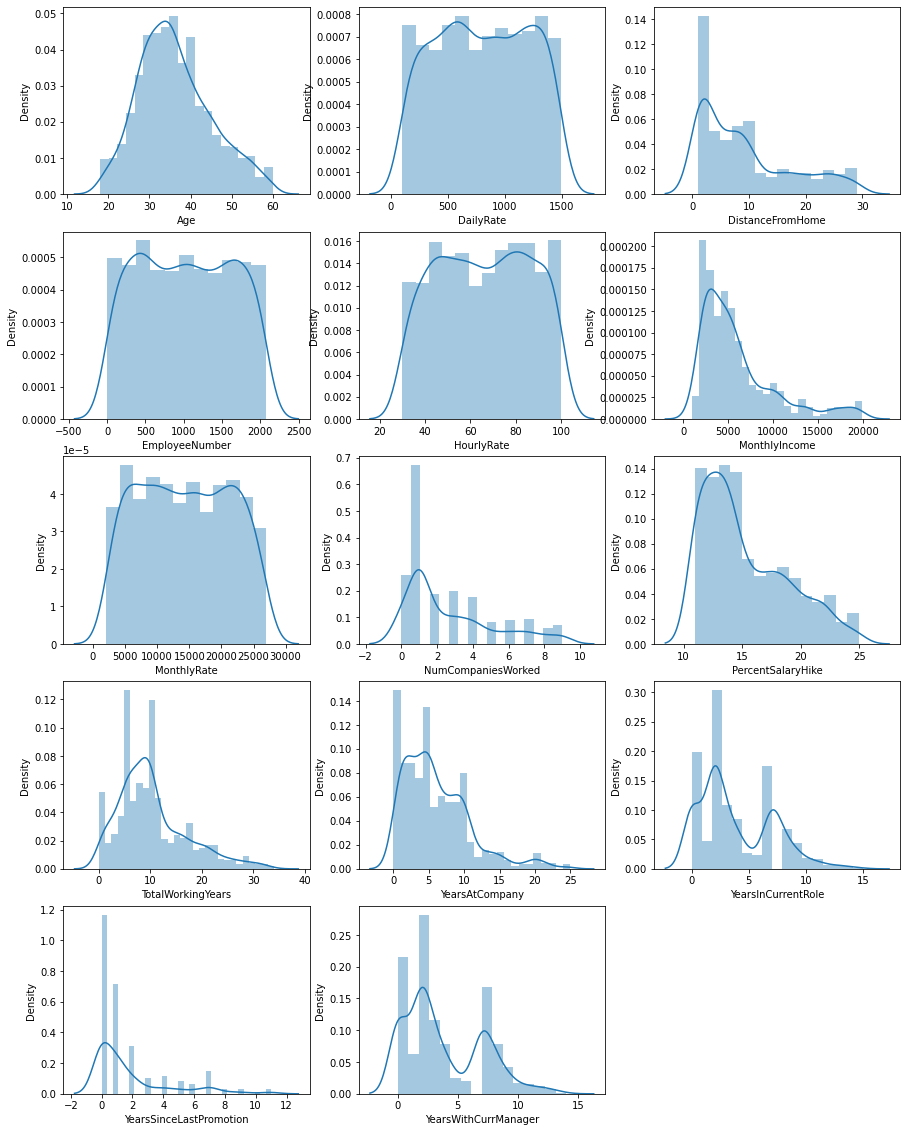

In [20]:
plt.figure(figsize=(15,20))
x=1
for i in con:
    plt.subplot(5,3,x)
    sns.distplot(df[i])
    x=x+1

# Bivariate

analysis for y and all x's

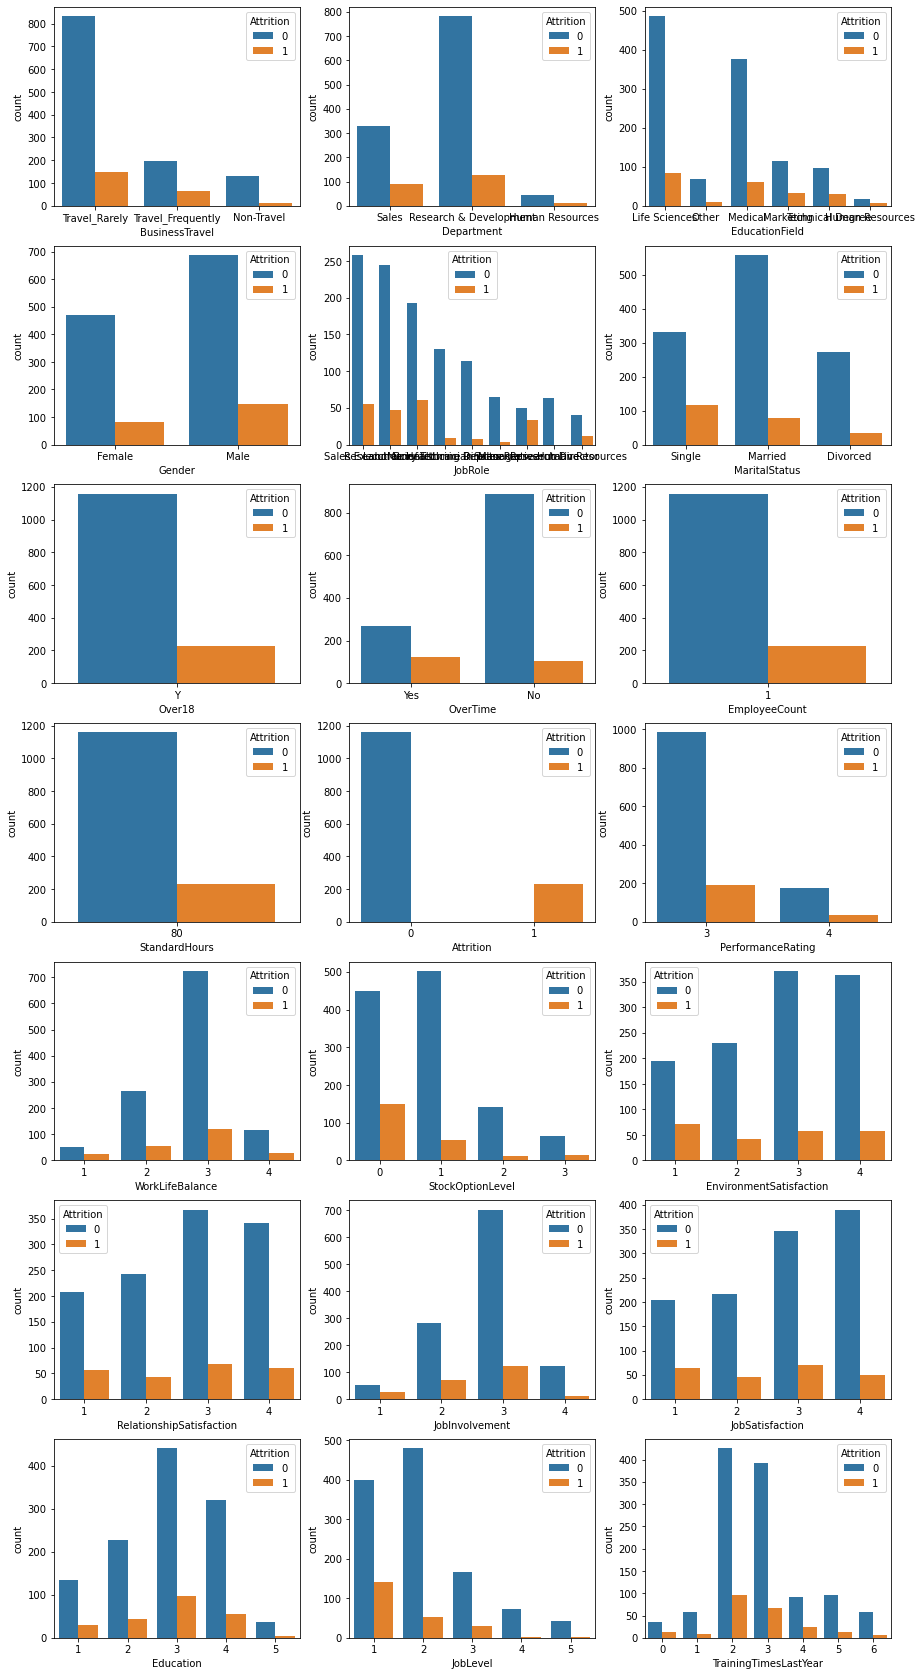

In [21]:
#count plot with hue for x and y both being categorical

plt.figure(figsize=(15,30))
x=1
for i in cat:
    plt.subplot(7,3,x)
    sns.countplot(df[i],hue=df['Attrition'])
    x=x+1

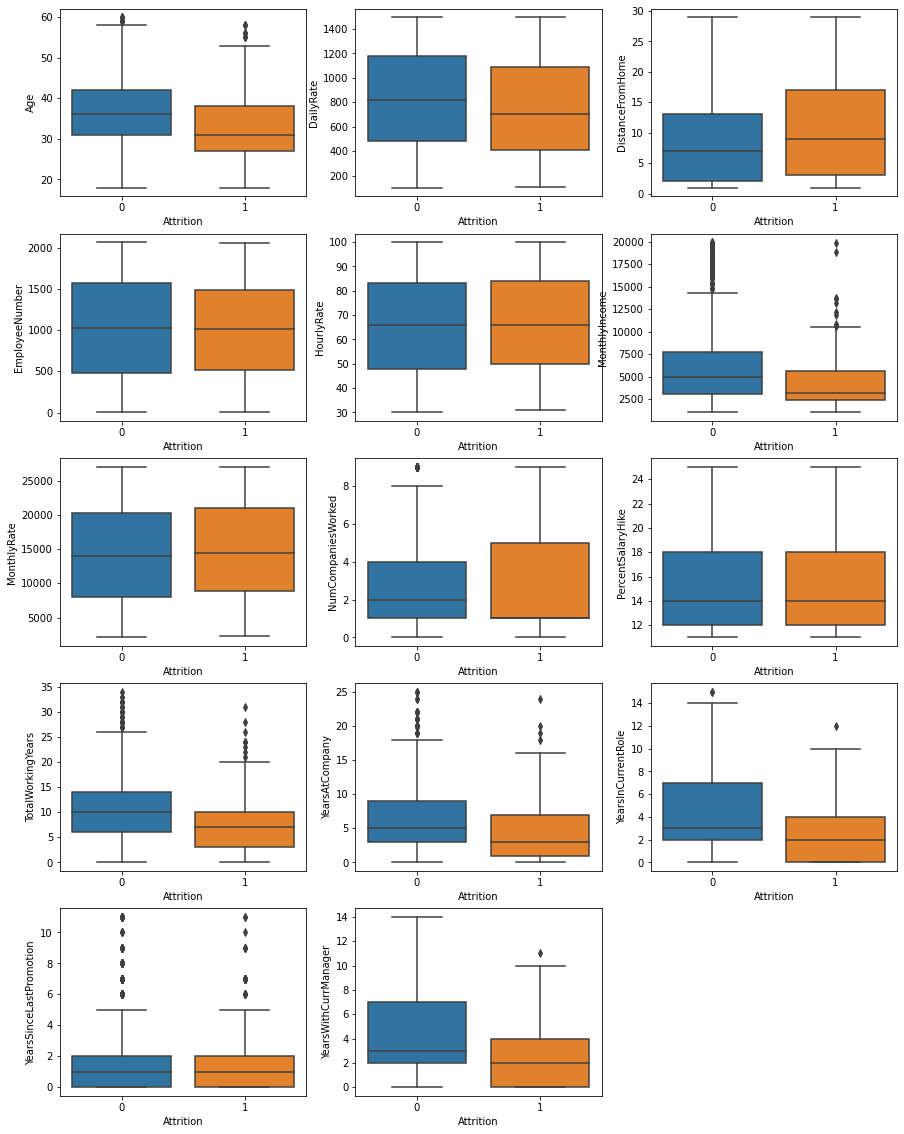

In [22]:
plt.figure(figsize=(15,20))
x=1
for i in con:
    plt.subplot(5,3,x)
    sns.boxplot(df['Attrition'],df[i])
    x=x+1

# Relationships

Perform test of hypothesis compare rates for same level male and female,check relationship between categorical variable age gender etc

<AxesSubplot:>

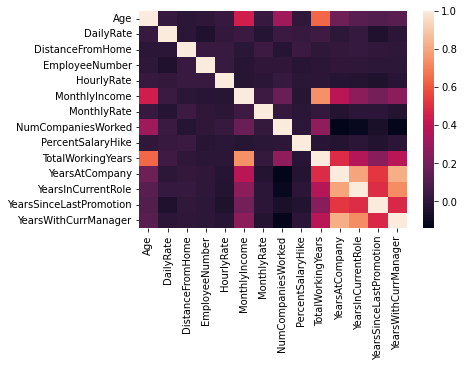

In [23]:
#for relation between con columns 

sns.heatmap(df[con].corr())

In [24]:
#for correlation between cat columns

def ANOVA(df,cat,con):
    from statsmodels.api import OLS
    from statsmodels.formula.api import ols
    rel= con+"~"+cat
    model=ols(rel,df).fit()
    from statsmodels.stats.anova import anova_lm
    anova_results=anova_lm(model)
    Q=pd.DataFrame(anova_results)
    a=Q['PR(>F)'][cat]
    return round (a,3)

In [25]:
q=[]
for i in con:
    pval=ANOVA(df,'Attrition',i)
    if(pval<0.05):
        q.append(i)

In [26]:
#these are con columns which have good relation with attrition column

q

['Age',
 'DailyRate',
 'DistanceFromHome',
 'MonthlyIncome',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsWithCurrManager']

In [27]:
#from chi square test for cat columns

def chisquare(df,cat1,cat2):
    from scipy.stats import chi2_contingency
    ct=pd.crosstab(df[cat1],df[cat2])
    a,b,c,d=chi2_contingency(ct)
    return b

In [28]:
q1=[]
for i in cat:
    pval=chisquare(df,'Attrition',i)
    if(pval<0.05):
        q1.append(i)

In [29]:
#These are columns having pval<0.05 which are useful coloumns

q1

['BusinessTravel',
 'Department',
 'EducationField',
 'JobRole',
 'MaritalStatus',
 'OverTime',
 'Attrition',
 'WorkLifeBalance',
 'StockOptionLevel',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobSatisfaction',
 'JobLevel',
 'TrainingTimesLastYear']

# Perform classification model using y=attrition choose best model
a.logistic reg
b.knn
c.decision tree
e.ann

In [30]:
X=df[q+q1]
X=X.drop(['Attrition'],axis=1)
Y=df['Attrition']

In [31]:
X.head()

,Age,DailyRate,DistanceFromHome,MonthlyIncome,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,BusinessTravel,Department,...,JobRole,MaritalStatus,OverTime,WorkLifeBalance,StockOptionLevel,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,JobLevel,TrainingTimesLastYear
0,41,1102,1,5993,8,6,4,5,Travel_Rarely,Sales,...,Sales Executive,Single,Yes,1,0,2,3,4,2,0
1,49,279,8,5130,10,10,7,7,Travel_Frequently,Research & Development,...,Research Scientist,Married,No,3,1,3,2,2,2,3
2,37,1373,2,2090,7,0,0,0,Travel_Rarely,Research & Development,...,Laboratory Technician,Single,Yes,3,0,4,2,3,1,3
3,33,1392,3,2909,8,8,7,0,Travel_Frequently,Research & Development,...,Research Scientist,Married,Yes,3,0,4,3,3,1,3
4,27,591,2,3468,6,2,2,2,Travel_Rarely,Research & Development,...,Laboratory Technician,Married,No,3,1,1,3,2,1,3


In [32]:
X1=pd.get_dummies(X)

In [33]:
X1.head()

,Age,DailyRate,DistanceFromHome,MonthlyIncome,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,WorkLifeBalance,StockOptionLevel,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1102,1,5993,8,6,4,5,1,0,...,0,0,0,1,0,0,0,1,0,1
1,49,279,8,5130,10,10,7,7,3,1,...,0,0,1,0,0,0,1,0,1,0
2,37,1373,2,2090,7,0,0,0,3,0,...,0,0,0,0,0,0,0,1,0,1
3,33,1392,3,2909,8,8,7,0,3,0,...,0,0,1,0,0,0,1,0,0,1
4,27,591,2,3468,6,2,2,2,3,1,...,0,0,0,0,0,0,1,0,1,0


In [34]:
#Scaling

ss=StandardScaler()
array=ss.fit_transform(X1)
X2=pd.DataFrame(array,columns=X1.columns)

In [35]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X2,Y,test_size=0.2,random_state=21)

# LogisticRegression

In [36]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model = lr.fit(xtrain,ytrain)
pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)
from sklearn.metrics import accuracy_score
tr_acc = accuracy_score(ytrain,pred_tr)
ts_acc = accuracy_score(ytest,pred_ts)
tr_acc,ts_acc

(0.8782687105500451, 0.8597122302158273)

In [37]:
from sklearn.model_selection import RandomizedSearchCV

In [38]:
lr=LogisticRegression()

hyp = {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }

rscv_lr_model = RandomizedSearchCV(lr,hyp,cv=9)

rscv_lr_model.fit(xtrain,ytrain)

RandomizedSearchCV(cv=9, estimator=LogisticRegression(),
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'max_iter': [100, 1000, 2500, 5000],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'solver': ['lbfgs', 'newton-cg',
                                                   'liblinear', 'sag',
                                                   'saga']})

In [39]:
rscv_lr_model.best_estimator_

LogisticRegression(C=0.08858667904100823, max_iter=1000, solver='newton-cg')

In [40]:
lr_model = rscv_lr_model.best_estimator_
lr_model.fit(xtrain,ytrain)

LogisticRegression(C=0.08858667904100823, max_iter=1000, solver='newton-cg')

In [41]:
tr_acc=lr_model.score(xtrain,ytrain)
ts_acc=lr_model.score(xtest,ytest)
tr_acc,ts_acc

(0.8827772768259693, 0.8597122302158273)

# DecisionTreeClassifier

In [42]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=21)
model = dtc.fit(xtrain,ytrain)
pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)
from sklearn.metrics import accuracy_score
tr_acc = accuracy_score(ytrain,pred_tr)
ts_acc = accuracy_score(ytest,pred_ts)
tr_acc,ts_acc

(1.0, 0.7446043165467626)

# RandomizedSearchCV

In [43]:
dtc_model  = DecisionTreeClassifier(random_state=101)

hyp = {"criterion": ["gini", "entropy"],'max_depth':np.arange(2,10),'min_samples_split':np.arange(2,20),
        'min_samples_leaf':np.arange(1,15)}

rscv_dt_model = RandomizedSearchCV(dtc_model,hyp,cv=9)

rscv_dt_model.fit(xtrain,ytrain)

RandomizedSearchCV(cv=9, estimator=DecisionTreeClassifier(random_state=101),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])})

In [44]:
rscv_dt_model.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=8,
                       random_state=101)

In [45]:
dt_model = rscv_dt_model.best_estimator_
dt_model.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=8,
                       random_state=101)

In [46]:
tr_acc=dt_model.score(xtrain,ytrain)
ts_acc=dt_model.score(xtest,ytest)
tr_acc,ts_acc

(0.8503155996393147, 0.8057553956834532)

# RandomForestClassifier

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
rf_model=RandomForestClassifier(random_state=101)
rf_model.fit(xtrain,ytrain)

RandomForestClassifier(random_state=101)

In [49]:
tr_acc=rf_model.score(xtrain,ytrain)
ts_acc=rf_model.score(xtest,ytest)
tr_acc,ts_acc

(1.0, 0.8381294964028777)

In [50]:
rf_model  = RandomForestClassifier(random_state=101)

hyp = {"criterion": ["gini", "entropy"],'max_depth':np.arange(2,10),'min_samples_split':np.arange(2,20),
        'min_samples_leaf':np.arange(1,15)}

rscv_rf_model = RandomizedSearchCV(rf_model,hyp,cv=9)

rscv_rf_model.fit(xtrain,ytrain)

RandomizedSearchCV(cv=9, estimator=RandomForestClassifier(random_state=101),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])})

In [51]:
rscv_rf_model.best_estimator_

RandomForestClassifier(max_depth=7, min_samples_leaf=4, min_samples_split=11,
                       random_state=101)

In [52]:
rf_model = rscv_rf_model.best_estimator_
rf_model.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=7, min_samples_leaf=4, min_samples_split=11,
                       random_state=101)

In [53]:
tr_acc=rf_model.score(xtrain,ytrain)
ts_acc=rf_model.score(xtest,ytest)
tr_acc,ts_acc

(0.8899909828674482, 0.8273381294964028)

# KNeighborsClassifier

In [54]:
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier()  
classifier.fit(xtrain, ytrain)  

KNeighborsClassifier()

In [55]:
tr_acc=classifier.score(xtrain,ytrain)
ts_acc=classifier.score(xtest,ytest)
tr_acc,ts_acc

(0.8791704238052299, 0.8237410071942446)

In [56]:
knn=KNeighborsClassifier()

hyp = { 'n_neighbors' : np.arange(5,15),
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

rscv_knn_model = RandomizedSearchCV(knn,hyp,cv=9)

rscv_knn_model.fit(xtrain,ytrain)

RandomizedSearchCV(cv=9, estimator=KNeighborsClassifier(),
                   param_distributions={'metric': ['minkowski', 'euclidean',
                                                   'manhattan'],
                                        'n_neighbors': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'weights': ['uniform', 'distance']})

In [57]:
rscv_knn_model.best_estimator_

KNeighborsClassifier(metric='euclidean', n_neighbors=12)

In [58]:
knn_model = rscv_knn_model.best_estimator_
knn_model.fit(xtrain,ytrain)

KNeighborsClassifier(metric='euclidean', n_neighbors=12)

In [59]:
tr_acc=knn_model.score(xtrain,ytrain)
ts_acc=knn_model.score(xtest,ytest)
tr_acc,ts_acc

(0.8575293056807936, 0.8237410071942446)

Here LogisticRegression is a good model